# Chapter 6: Factor Models #

## Code segment 6.1  
Figure 6.1 in Section 6.5

n=4.000000, T=5769.000000
Eigenvalues: [2.44359783 0.89440863 0.47726874 0.1847248 ]


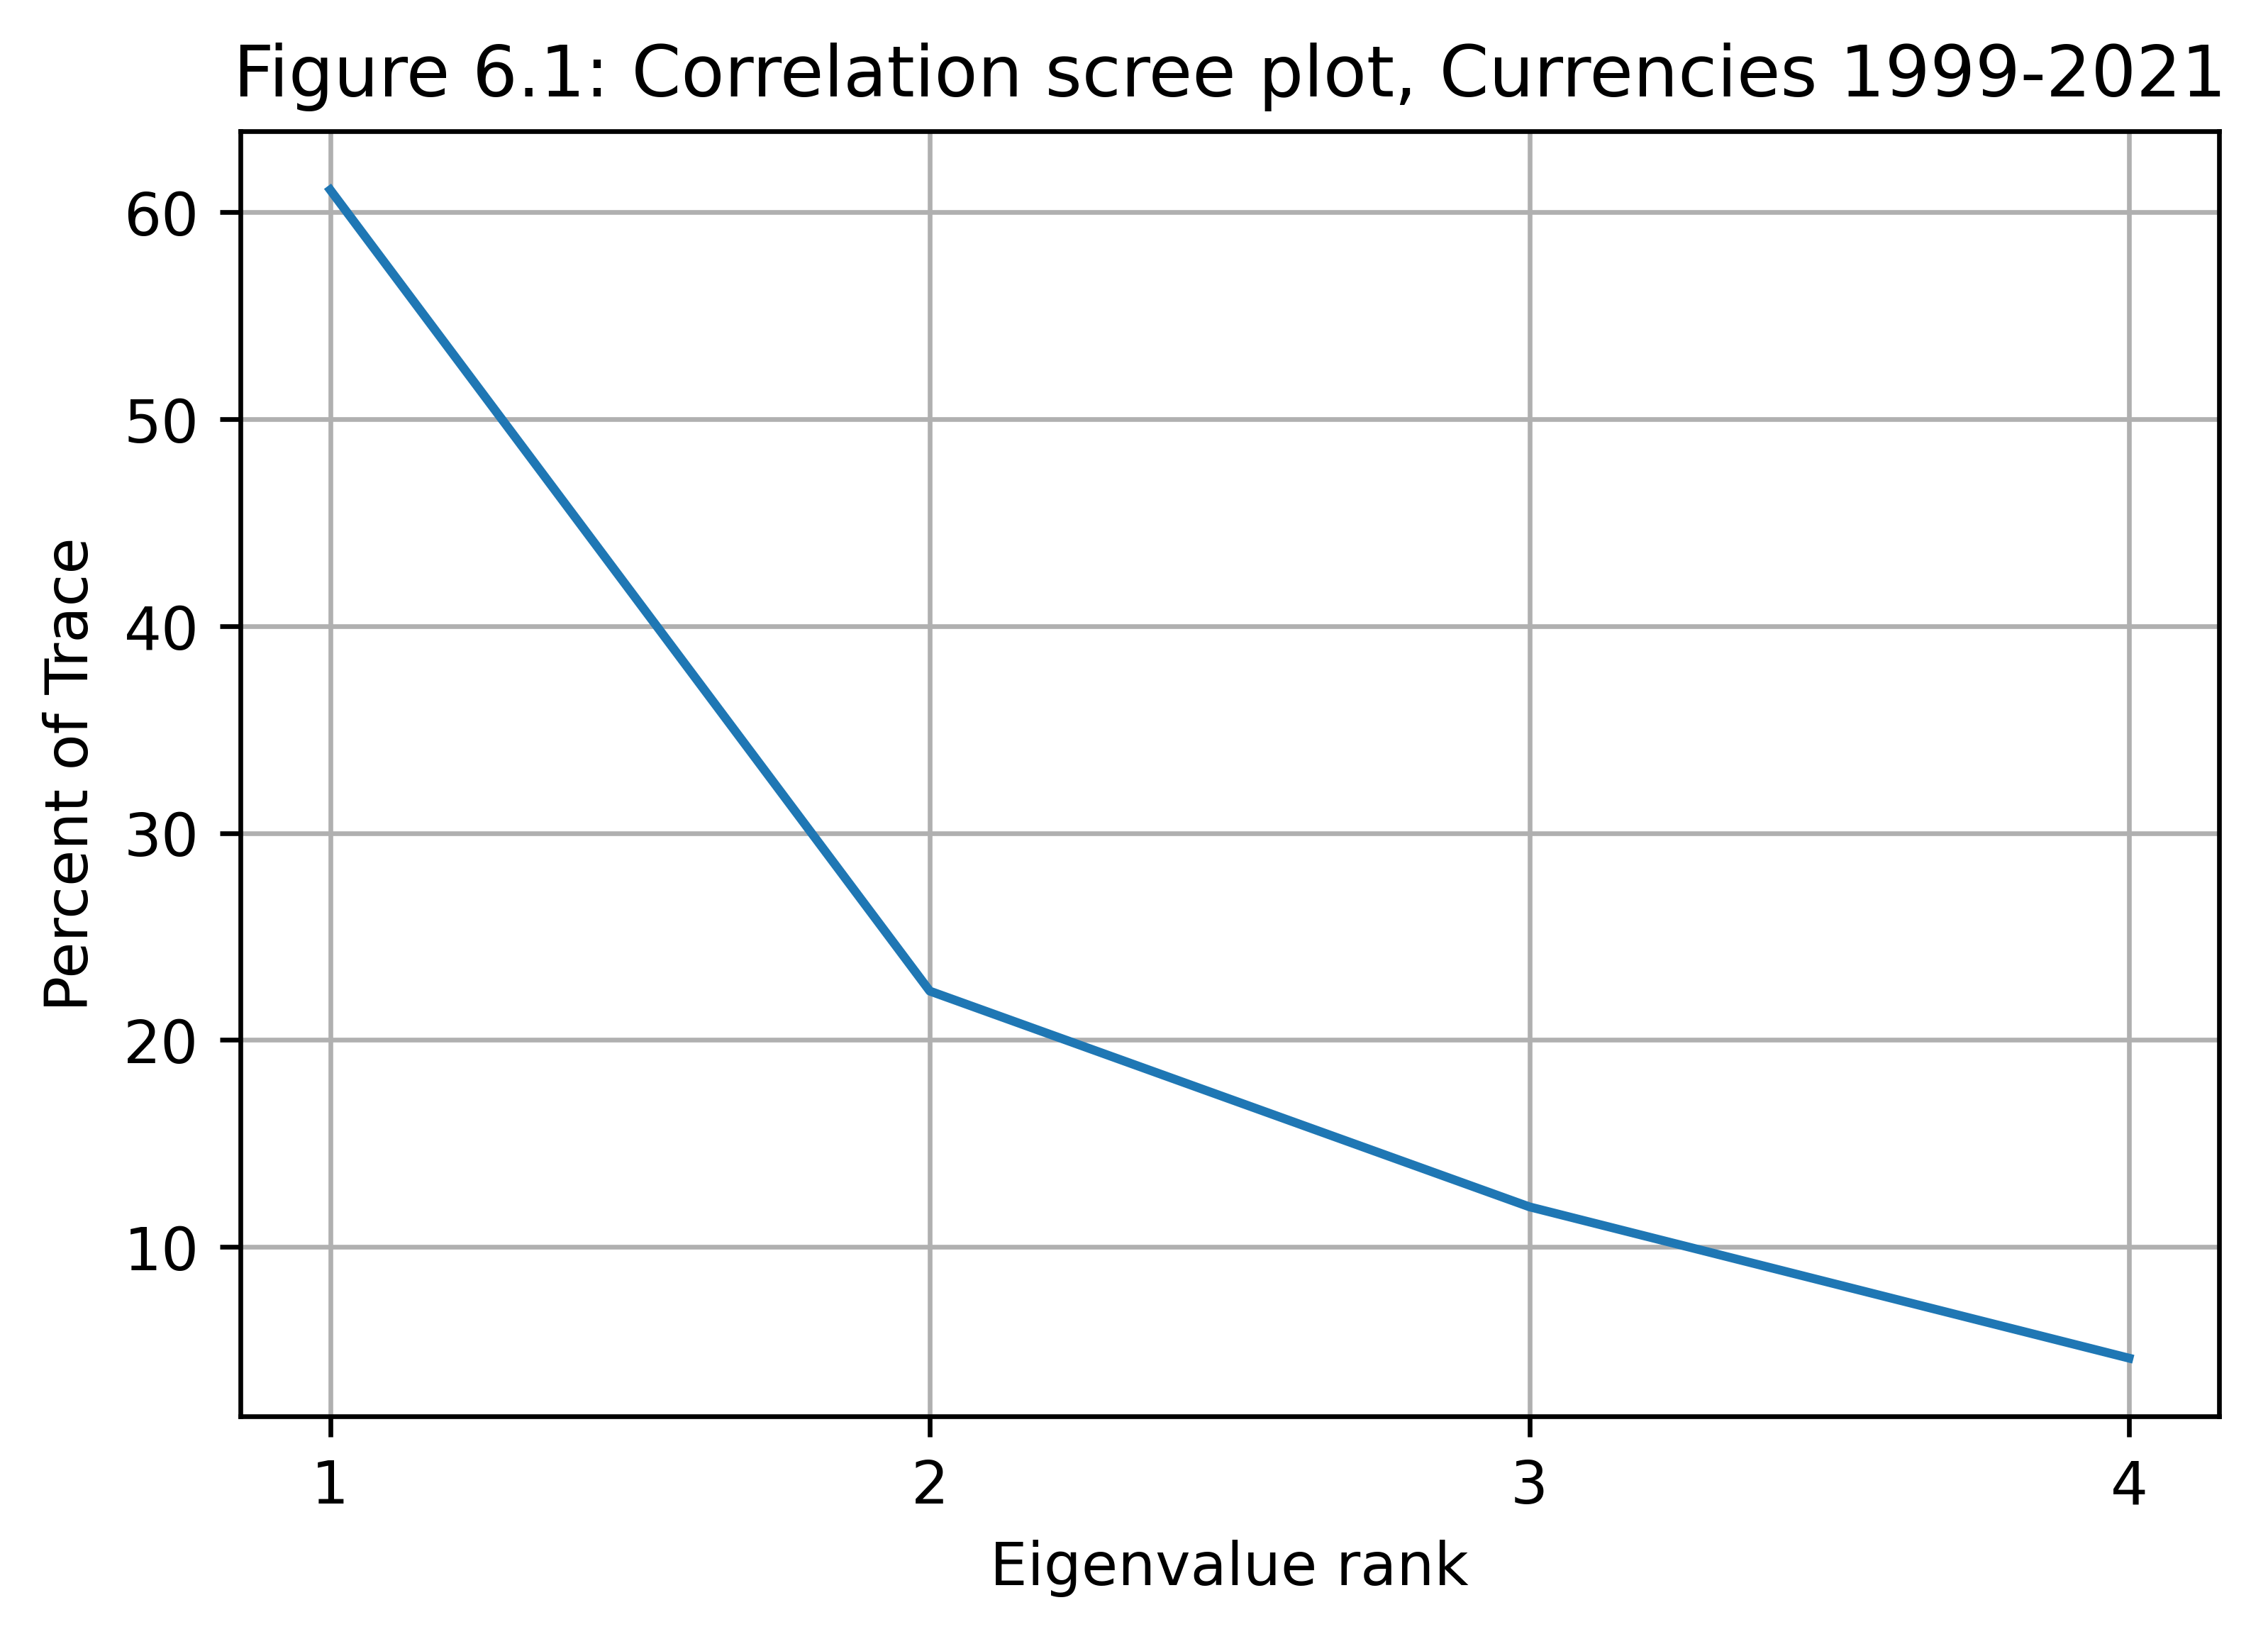

In [2]:
#Code Segment 6.1
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import qrpm_funcs as qf
plt.rcParams['figure.dpi']= 300

#get sorted eigenvalues and eigenvectors
def eig_get(M):
    evals,evecs=np.linalg.eigh(M)  #eigh is for symmetric M
    #Put the eigensystem in decreasing order of eigenvalues
    sortorder=evals.argsort()[::-1]
    evals=evals[sortorder]
    evecs=evecs[:,sortorder]
    return(evals,evecs)

#Get 4 currencies until the end of previous year.
firstday='1999-01-04'
lastday=qf.LastYearEnd()
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS','DEXUSEU']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,
            startdate=firstday,enddate=lastday)
multipliers=[-1,1,-1,1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#compute correlation matrix and covariance matrix for later use
R=np.corrcoef(np.array(difflgs).T)
c=np.cov(np.array(difflgs).T)

#Make the scree plot
evals,evecs=eig_get(R)
plt.plot(range(1,5), list(evals*100/sum(evals)))

## Configure the graph
plt.title('Figure 6.1: Correlation scree plot, Currencies 1999-'+lastday[:4])
plt.xlabel('Eigenvalue rank')
plt.ylabel('Percent of Trace')
plt.xticks(range(1,5),range(1,5))
plt.grid(True)
plt.show;

#Display shape for Marchenko-Pastur
T,n = np.shape(difflgs)
print('n=%2f, T=%2f' % (n, T))

#Display eigenvalues
print('Eigenvalues:',evals)

## Code segment 6.2  
Figure 6.2 in Section 6.5

Ratio = 0.000693
    Expected range from 0.95 to 1.05
Ratio = 0.500000
    Expected range from 0.09 to 2.91


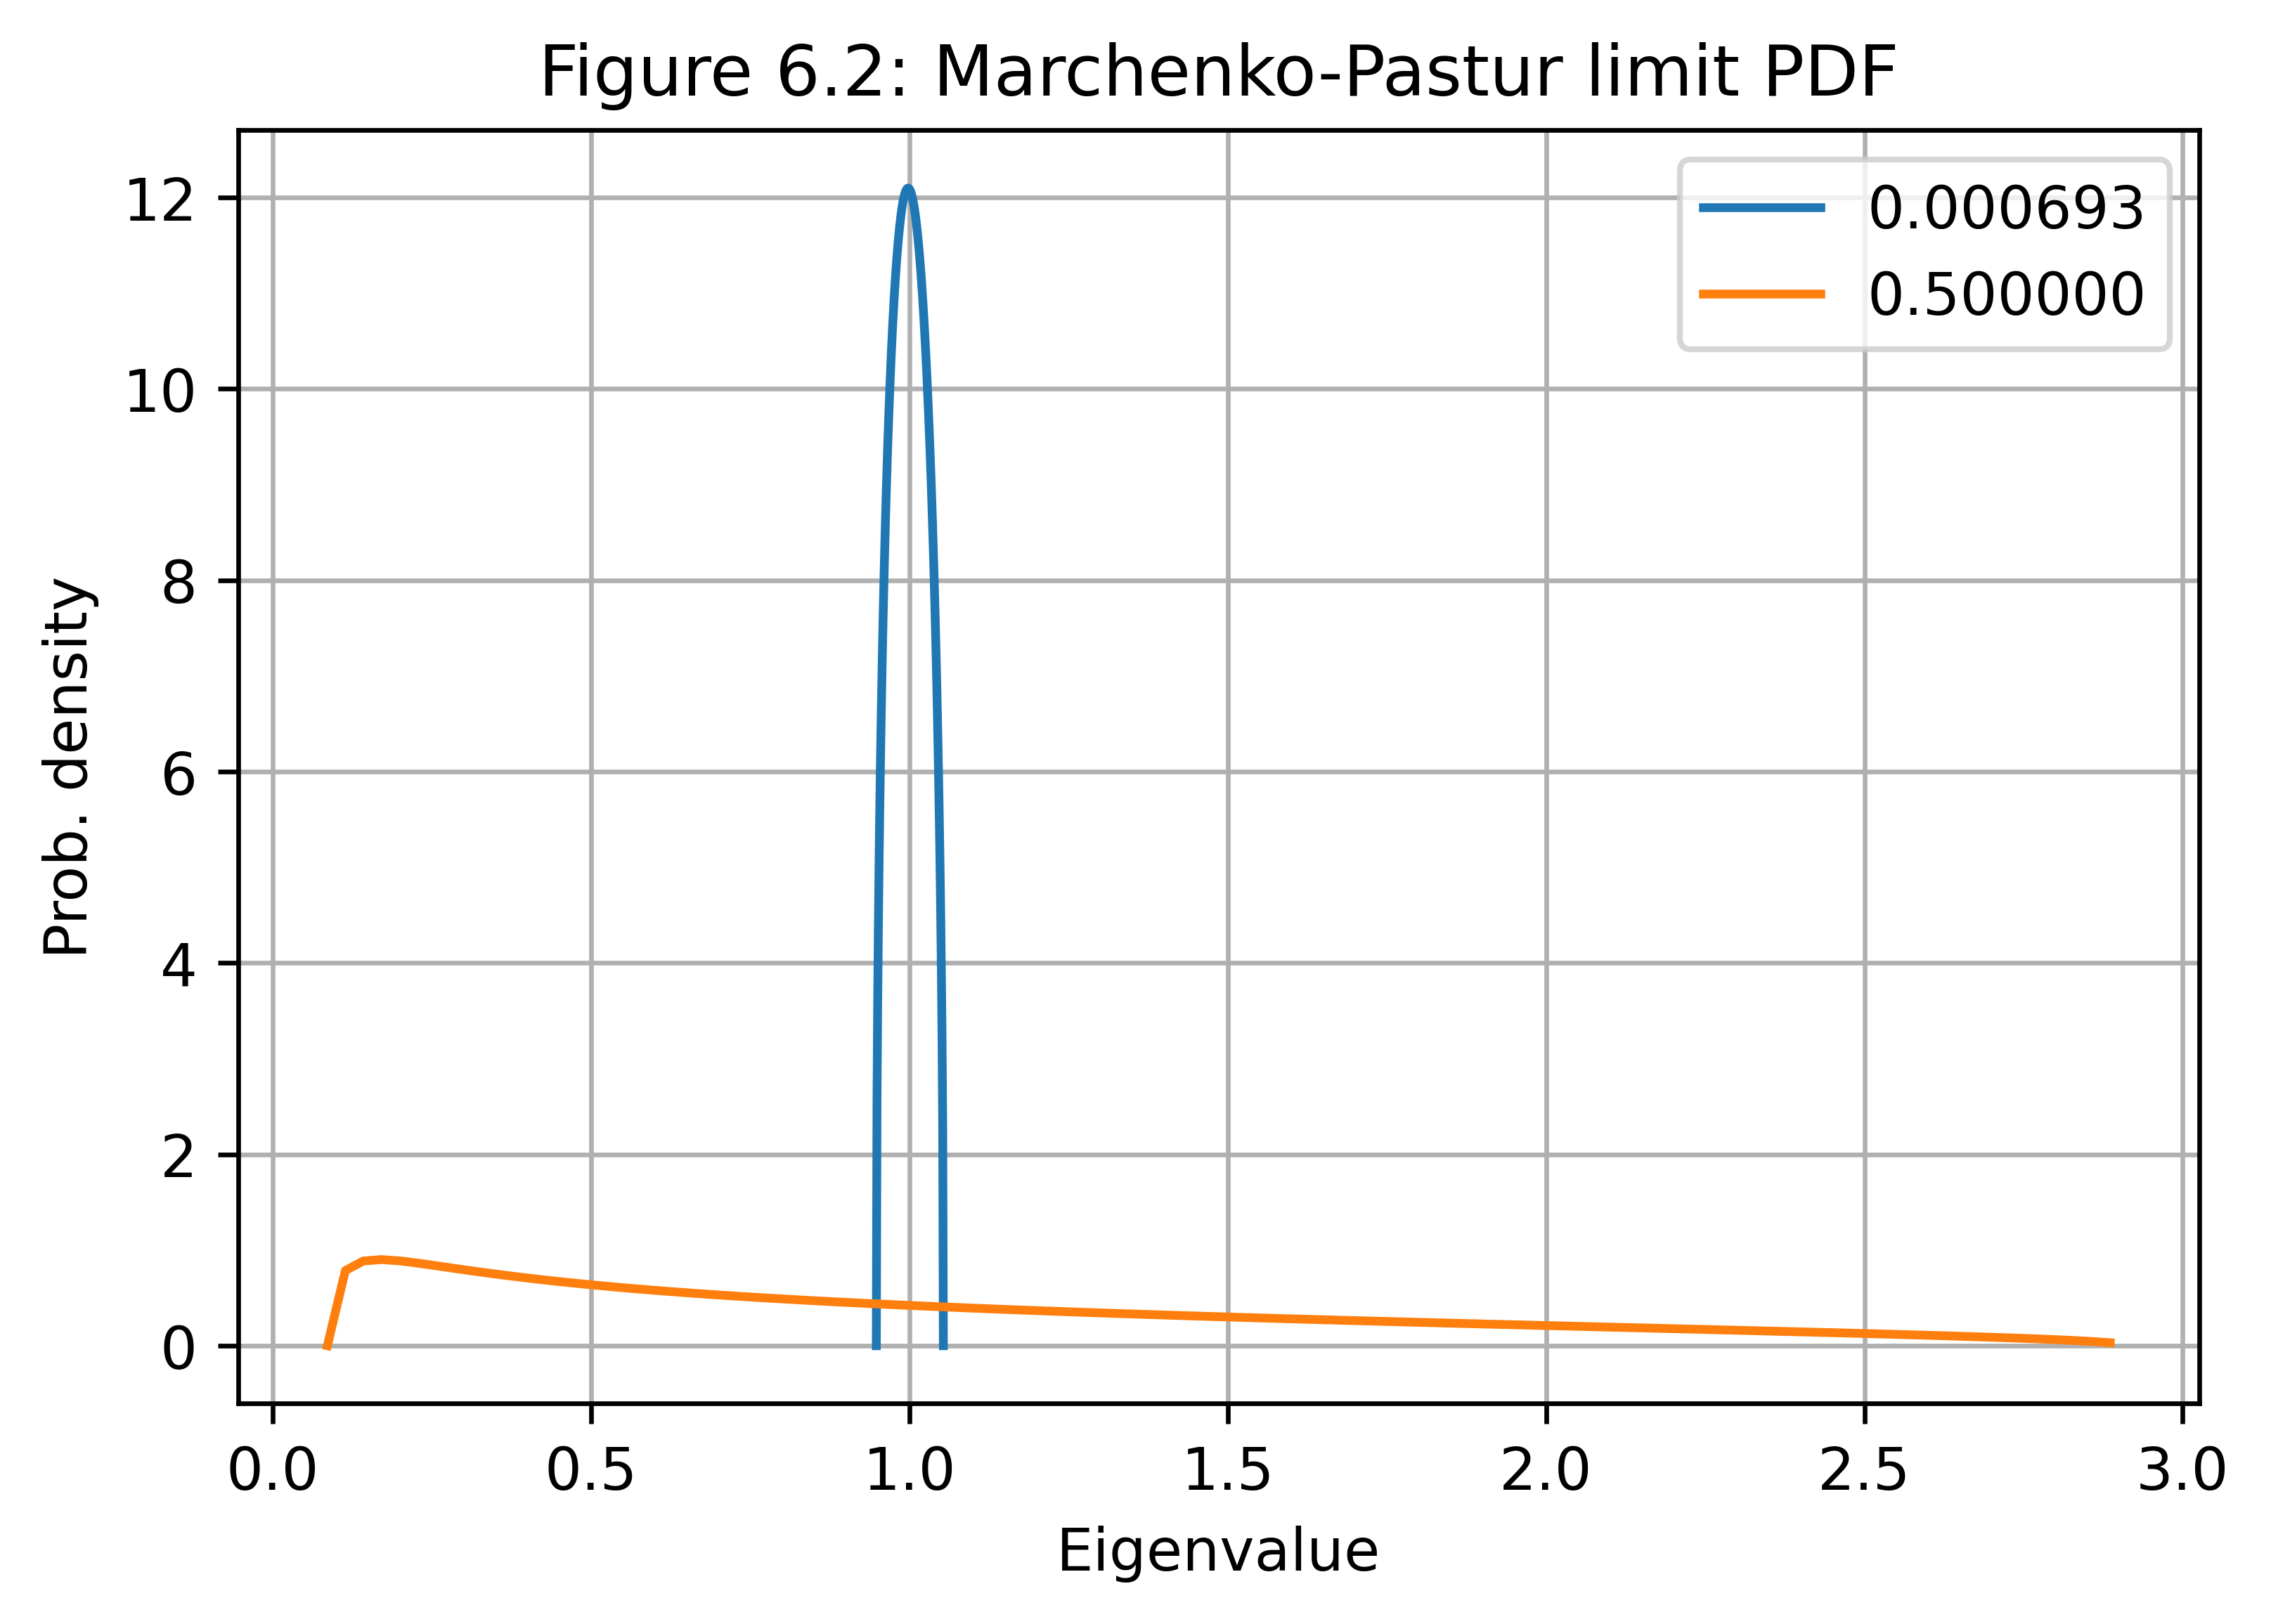

In [3]:
#Code Segment 6.2
#Graph Marchenko-Pastur PDF

for ratio in [n/T,.5]:
    g_minus=(1-np.sqrt(ratio))**2
    g_plus=(1+np.sqrt(ratio))**2

    print('Ratio = %2.6f' % ratio)
    print('    Expected range from %4.2f to %4.2f' % (g_minus, g_plus))

    x=np.arange(g_minus,g_plus,(g_plus-g_minus)/100)
    y=[(1/ratio)*np.sqrt(np.abs((g_plus-g)*(g-g_minus)))/(2*np.pi*g) for g in x]
    label = '%2.6f' % ratio
    plt.plot(x, y, label=label)

## Configure the graph
plt.title('Figure 6.2: Marchenko-Pastur limit PDF')
plt.xlabel('Eigenvalue')
plt.ylabel('Prob. density')
plt.legend()
plt.grid(True)
plt.show;

## Code segment 6.3  
Covariance matrix calculations in Section 6.5

In [4]:
#Code Segment 6.3
#Display the 4x4 covariance matrix
np.set_printoptions(precision=4,floatmode='fixed',sign=' ')
print('1999-'+lastday[:4]+' covariance matrix (Cfull): (%d days)' % len(difflgs))
print('     CHF     GBP     JPY     EUR')
for i in range(4):
    print(c[i]*10000)

#Compute 2008 covariance matrix
s2008=lgdates.index('2008-01-02')
e2008=lgdates.index('2008-12-31')
c2008=np.cov(np.array(difflgs[s2008-1:e2008+1]).T)
#Display the 4x4 covariance matrix
print('2008 covariance matrix (C2008):')
for i in range(4):
    print(c2008[i]*10000)

1999-2021 covariance matrix (Cfull): (5769 days)
     CHF     GBP     JPY     EUR
[ 0.4334  0.1908  0.1594  0.3080]
[ 0.1908  0.3449  0.0526  0.2173]
[ 0.1594  0.0526  0.3877  0.1069]
[ 0.3080  0.2173  0.1069  0.3498]
2008 covariance matrix (C2008):
[ 0.9045  0.3453  0.3816  0.6867]
[ 0.3453  0.9142 -0.2797  0.5875]
[ 0.3816 -0.2797  0.9572  0.0110]
[ 0.6867  0.5875  0.0110  0.8044]


## Code segment 6.4  
Eigensystem of Cfull in Section 6.5

In [5]:
#Code Segment 6.4
#Display the eigenvalues
evals,evecs=eig_get(c)
print('Full period eigenvalues times 10**6:')
print(evals*1000000)

#Display the eigenvectors
print('Eigenvector (column) matrix:')
labels=['CHF','GBP','JPY','EUR']
for i in range(4):
    print(labels[i],evecs[i])

Full period eigenvalues times 10**6:
[ 92.9893  33.8204  17.7947   6.9809]
Eigenvector (column) matrix:
CHF [-0.6212 -0.0044  0.5418 -0.5662]
GBP [-0.4392 -0.4192 -0.7575 -0.2398]
JPY [-0.3348  0.8861 -0.3150  0.0590]
EUR [-0.5560 -0.1975  0.1828  0.7864]


## Code system 6.5  
Eigensystem of 2008 matrix in Section 6.5

In [6]:
#Code Segment 6.5
#get eigenvalues and eigenvectors of the 2008 matrix
evals2008,evecs2008=eig_get(c2008)

#Display the 2008 eigenvalues
print('2008 eigenvalues times 10**6:')
print(evals2008*1000000)

#Display the 2008 eigenvectors
print('2008 eigenvector (column) matrix:')
for i in range(4):
    print(labels[i],evecs2008[i])

2008 eigenvalues times 10**6:
[ 196.6205  125.9944   27.9513    7.4675]
2008 eigenvector (column) matrix:
CHF [-0.5949  0.3290  0.3950 -0.6178]
GBP [-0.5133 -0.4496 -0.7044 -0.1956]
JPY [-0.0894  0.8280 -0.5177  0.1960]
EUR [-0.6120 -0.0638  0.2824  0.7359]


## Code segment 6.6  
Covariance matrices based on fewer eigenvectors in Section 6.5

In [7]:
#Code Segment 6.6
#Compute and display currency covariance matrix
#based on fewer principal components with various heuristics

def display_trunc(matrix,n_2_use=2):
    #Display matrix with truncated eigensystem
    
    #Round to integer
    num_2_use=int(n_2_use)
    
    evals,evecs=eig_get(matrix)
    
    #Form truncated diagonal matrix G of eigenvalues
    g_trunc=np.diag(evals)[:num_2_use]
    del_cols=np.arange(num_2_use,len(evals))
    g_trunc=np.delete(g_trunc,del_cols,1)

    #Form truncated matrix E_k of eigenvectors
    e_trunc=np.delete(evecs,del_cols,1)

    m_trunc=(e_trunc @ g_trunc) @ e_trunc.T
    m_scale=np.multiply(np.matrix.trace(matrix)/np.matrix.trace(m_trunc),m_trunc)
    
    #Constant residual
    h=np.copy(evals)
    if n_2_use >= 4:
        residual=0
    else:
        residual=np.sum(evals[n_2_use:])/(4-n_2_use)
    for i in range(n_2_use,4):
        h[i]=residual
    m_constres=(evecs @ np.diag(h)) @ evecs.T
        
    print('Original matrix:')
    print('     CHF     GBP     JPY     EUR')
    for i in range(4):
        print(matrix[i]*10000)
    print('Truncated matrix:')
    for i in range(4):
        print(m_trunc[i]*10000)
    print('Scaled truncated matrix:')
    for i in range(4):
        print(m_scale[i]*10000)
    print('Constant residual matrix:')
    for i in range(4):
        print(m_constres[i]*10000)
        
while True:
    print("Input #eigenvectors to use (1-4), 0 to stop")
    n_to_use=int(input())
    if n_to_use<1:
        break
    display_trunc(c,n_to_use)

Input #eigenvectors to use (1-4), 0 to stop


 2

Original matrix:
     CHF     GBP     JPY     EUR
[ 0.4334  0.1908  0.1594  0.3080]
[ 0.1908  0.3449  0.0526  0.2173]
[ 0.1594  0.0526  0.3877  0.1069]
[ 0.3080  0.2173  0.1069  0.3498]
Truncated matrix:
[ 0.3588  0.2543  0.1921  0.3215]
[ 0.2543  0.2388  0.0111  0.2551]
[ 0.1921  0.0111  0.3698  0.1139]
[ 0.3215  0.2551  0.1139  0.3007]
Scaled truncated matrix:
[ 0.4289  0.3040  0.2296  0.3843]
[ 0.3040  0.2855  0.0133  0.3049]
[ 0.2296  0.0133  0.4421  0.1362]
[ 0.3843  0.3049  0.1362  0.3594]
Constant residual matrix:
[ 0.4349  0.2203  0.1668  0.2786]
[ 0.2203  0.3170  0.0389  0.2146]
[ 0.1668  0.0389  0.3825  0.1125]
[ 0.2786  0.2146  0.1125  0.3814]
Input #eigenvectors to use (1-4), 0 to stop


 0